# Compare tau decay distributions between Tauola and IceCube simulations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils.hepmc_io import load_hepmc 
from collections import Counter

## Load decays

In [3]:
decay_products = load_hepmc("../data/tauola_output_genie_e5.dat").groupby("event_num").nth[3:].sort_values("event_num")
decay_products_nopol = load_hepmc("../data/tauola_output_genie_nopol_e5.dat").groupby("event_num").nth[3:].sort_values("event_num")
decay_products_g4 = pd.read_csv("../data/geant4_output_e5.csv").sort_values("event_num")

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


In [4]:
decay_products

,event_num,pdg,E,px,py,pz
3,4,16,1.132845,0.439469,-0.681560,0.790937
4,4,-211,2.542037,-0.439625,0.607542,2.424891
8,5,16,2.374586,0.328642,-0.758280,2.226109
9,5,-211,0.201790,-0.041125,-0.122461,0.067468
10,5,111,1.559740,0.206179,0.640255,1.400763
...,...,...,...,...,...,...
962481,995223,16,1.253278,0.531283,0.029987,1.134657
962488,995224,111,0.296558,0.028991,0.085612,0.248116
962489,995224,111,0.593272,0.097600,0.156441,0.547501
962487,995224,16,1.834136,0.497874,-0.366712,1.726731


In [5]:
decay_products_nopol

,event_num,pdg,E,px,py,pz
3,4,16,2.926796,0.559238,-0.377204,2.847983
4,4,-211,0.748086,-0.559394,0.303186,0.367845
8,5,16,0.970735,0.704091,0.098916,0.660830
9,5,-211,1.843488,0.004564,0.149986,1.832062
10,5,111,1.321893,-0.214959,-0.489388,1.201448
...,...,...,...,...,...,...
962321,995223,16,1.267714,-0.138372,0.509589,1.152464
962324,995223,211,1.406924,0.293403,-0.048386,1.368039
962329,995224,11,3.073834,-0.520938,-0.088451,3.028078
962328,995224,16,1.072256,0.631138,0.398764,0.769601


In [6]:
decay_products_g4

,event_num,pdg,E,px,py,pz
0,0,-211,2.146640,0.471600,-0.772368,1.941550
186609,0,16,1.524980,-0.470983,0.699429,1.270650
186545,0,-211,2.146640,0.471600,-0.772368,1.941550
16687,0,-211,2.146640,0.471600,-0.772368,1.941550
50,0,16,1.524980,-0.470983,0.699429,1.270650
...,...,...,...,...,...,...
663250,154396,111,0.469655,-0.001677,-0.124349,0.432310
663252,154396,111,1.573080,-0.210799,0.439569,1.489530
663254,154396,-211,0.371869,0.225772,-0.184209,0.184122
663260,154397,16,3.216270,0.801167,0.080347,3.113850


## Compare Geant4 decay products with Tauola decay products

In [7]:
def get_particle_property(decay_products: pd.DataFrame, pdg: int, prop: str) -> tuple[pd.Series, pd.Series]:
    nutau_e = decay_products.query("pdg == 16")[prop]
    anti_nutau_e = decay_products.query("pdg == -16")[prop]
    return nutau_e, anti_nutau_e


def compare_histos(nutau, anti_nutau, nutau_nopol, anti_nutau_nopol, nutau_g4, anti_nutau_g4, bins, density=None, **kwargs):
    fig, axs = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, layout="constrained")

    for ax, label, lists, in zip(axs, ("Neutrino", "Anti-neutrino"), ((nutau, nutau_nopol, nutau_g4), (anti_nutau, anti_nutau_nopol, anti_nutau_g4))):
        for energies, particle_type in zip(lists, ("polarized", "unpolarized (Tauola)", "unpolarized (Geant4)")):
            ax.hist(energies, bins=bins, label=f"{label} {particle_type}", density=density, histtype="step", lw=2)
            # ax.set_title(f"{label} {particle_type}")
            
    for ax in axs.flat:
        ax.set(**kwargs, ylabel="Density of number of neutrinos")
        ax.grid(True, alpha=0.5)
        ax.legend(fontsize="large")

    return fig, axs

/home/simon/miniconda3/envs/cern-skhep/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/simon/miniconda3/envs/cern-skhep/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: xlabel='Neutrino energy [GeV]', ylabel='Density of number of neutrinos'>,
        <Axes: xlabel='Neutrino energy [GeV]', ylabel='Density of number of neutrinos'>],
       dtype=object))

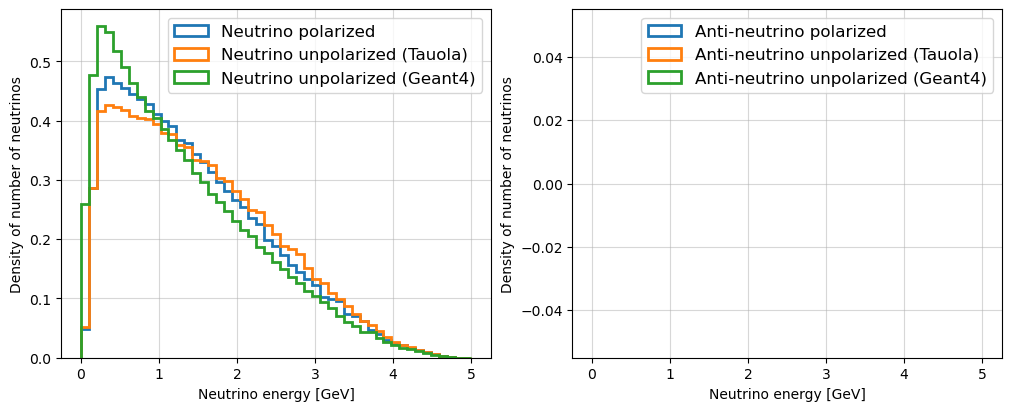

In [8]:
nutau, anti_nutau = get_particle_property(decay_products, 16, "E")
nutau_nopol, anti_nutau_nopol = get_particle_property(decay_products_nopol, 16, "E")
nutau_g4, anti_nutau_g4 = get_particle_property(decay_products_g4, 16, "E")

compare_histos(nutau, anti_nutau, nutau_nopol, anti_nutau_nopol, nutau_g4, anti_nutau_g4, 
               bins=np.linspace(0, 5, 50), xlabel="Neutrino energy [GeV]", density=True)

/home/simon/miniconda3/envs/cern-skhep/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/simon/miniconda3/envs/cern-skhep/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: xlabel='Tau visible energy [GeV]', ylabel='Density of number of neutrinos'>,
        <Axes: xlabel='Tau visible energy [GeV]', ylabel='Density of number of neutrinos'>],
       dtype=object))

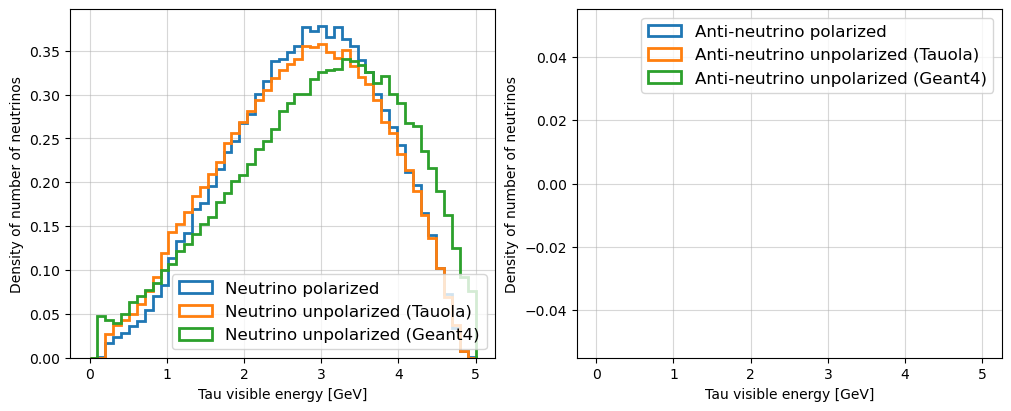

In [25]:
nutau = decay_products.query("pdg != 16").groupby("event_num")["E"].sum()
nutau_nopol = decay_products_nopol.query("pdg != 16").groupby("event_num")["E"].sum()
nutau_g4 = decay_products_g4.query("pdg != 16").groupby("event_num")["E"].sum()

compare_histos(nutau, np.array([]), nutau_nopol, np.array([]), nutau_g4, np.array([]), 
               bins=np.linspace(0, 5, 50), xlabel="Tau visible energy [GeV]", density=True)

When viewing the distribution of all events (regardless of decay mode) and the neutrino energy in these cases, there is a slight shift. In the polarized simulations, the neutrinos typically have a lower energy that in the unpolarized case. This would mean that IceCube simulations using the unpolarized simulations underestimate the energy deposited in the detector, i.e., overestimate the missing energy.

## Pion momentum fraction
See Fig. 2 in the DUNE paper

In [9]:
def is_pion_nutau_event(event: pd.DataFrame) -> bool:
    return (event["pdg"] == -211).any() and (event["pdg"] == 16).any() and (event.shape[0] == 2)

# Only select events that decay to a pion and a neutrino (211 and 16)
pion_neutrino_events = (
    decay_products
    .groupby("event_num")
    .filter(is_pion_nutau_event)
)

pion_neutrino_events_nopol = (
    decay_products_nopol
    .groupby("event_num")
    .filter(is_pion_nutau_event)
)

pion_neutrino_events_g4 = (
    decay_products_g4
    .groupby("event_num")
    .filter(is_pion_nutau_event)
)

In [10]:
def pion_momentum_fraction(decay_products):
    # Calculate the momentum fraction of the tau neutrino relative to the total momentum of all decay products
    pion_momentum = (
        decay_products
        .query("pdg.abs() == 211")
        .loc[:, "px":"pz"]
        .pow(2)
        .sum(axis=1)
        .pow(0.5)
    )

    decay_products = decay_products.copy()
    decay_products.loc[:, "P"] = decay_products.loc[:, "px":"pz"].pow(2).sum(axis=1).pow(0.5)
    
    tau_momentum = (
        decay_products
        .groupby("event_num")
        ["P"].sum()
    )
    return pion_momentum.values / tau_momentum.values


def nu_momentum_fraction(decay_products):
    # Calculate the momentum fraction of the tau neutrino relative to the total momentum of all decay products
    nu_momentum = (
        decay_products
        .query("pdg.abs() == 16")
        .loc[:, "px":"pz"]
        .pow(2)
        .sum(axis=1)
        .pow(0.5)
    )

    decay_products = decay_products.copy()
    decay_products.loc[:, "P"] = decay_products.loc[:, "px":"pz"].pow(2).sum(axis=1).pow(0.5)
    
    tau_momentum = (
        decay_products
        .groupby("event_num")
        ["P"].sum()
    )
    return nu_momentum.values / tau_momentum.values

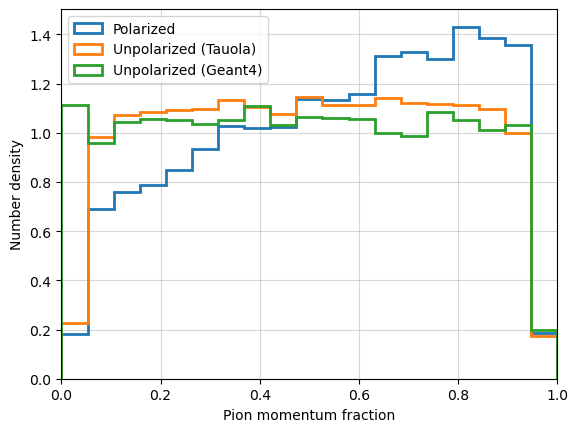

In [11]:
# Plot the momentum fraction as a histogram from 0 to 1
fig, ax = plt.subplots()
ax.hist(pion_momentum_fraction(pion_neutrino_events), bins=np.linspace(0, 1, 20), label="Polarized", histtype="step", density=True, lw=2)
ax.hist(pion_momentum_fraction(pion_neutrino_events_nopol), bins=np.linspace(0, 1, 20), label="Unpolarized (Tauola)", histtype="step", density=True, lw=2)
ax.hist(pion_momentum_fraction(pion_neutrino_events_g4), bins=np.linspace(0, 1, 20), label="Unpolarized (Geant4)", histtype="step", density=True, lw=2)
ax.set(xlim=(0, 1), xlabel="Pion momentum fraction", ylabel="Number density")
ax.grid(True, alpha=0.5)
ax.legend()

We see a clear difference between the decay using Tauola with real polarization given by GENIE and the unpolarized decay by Geant4.
A similar difference would likely be seen for the IceCube simulations.

In [12]:
# TODO plot momentum fraction of neutrino for various decay modes. tau -> pi0 pi- nu_tau, tau -> pi0 pi0 pi- nu_tau etc. See Dune paper for details
def is_pi0_pim_nutau_event(event: pd.DataFrame) -> bool:
    return (event["pdg"] == -211).any() and (event["pdg"] == 111).any() and (event["pdg"] == 16).any() and (event.shape[0] == 3)

# Only select events that decay to a pion and a neutrino (211 and 16)
pion_neutrino_events = (
    decay_products
    .groupby("event_num")
    .filter(is_pi0_pim_nutau_event)
)

pion_neutrino_events_nopol = (
    decay_products_nopol
    .groupby("event_num")
    .filter(is_pi0_pim_nutau_event)
)

pion_neutrino_events_g4 = (
    decay_products_g4
    .groupby("event_num")
    .filter(is_pi0_pim_nutau_event)
)

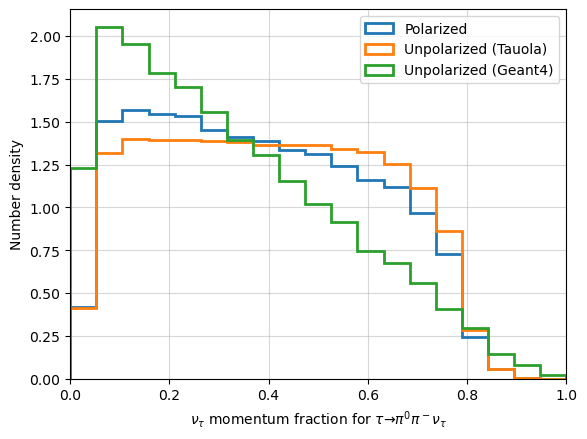

In [21]:
# Plot the momentum fraction as a histogram from 0 to 1
fig, ax = plt.subplots()
ax.hist(nu_momentum_fraction(pion_neutrino_events), bins=np.linspace(0, 1, 20), label="Polarized", histtype="step", density=True, lw=2)
ax.hist(nu_momentum_fraction(pion_neutrino_events_nopol), bins=np.linspace(0, 1, 20), label="Unpolarized (Tauola)", histtype="step", density=True, lw=2)
ax.hist(nu_momentum_fraction(pion_neutrino_events_g4), bins=np.linspace(0, 1, 20), label="Unpolarized (Geant4)", histtype="step", density=True, lw=2)
ax.set(xlim=(0, 1), xlabel=r"$\nu_\tau$ momentum fraction for $\tau\to\pi^0\pi^-\nu_\tau$", ylabel="Number density")
ax.grid(True, alpha=0.5)
ax.legend()

In [19]:
decay_products_g4

,event_num,pdg,E,px,py,pz
0,0,-211,2.146640,0.471600,-0.772368,1.941550
186609,0,16,1.524980,-0.470983,0.699429,1.270650
186545,0,-211,2.146640,0.471600,-0.772368,1.941550
16687,0,-211,2.146640,0.471600,-0.772368,1.941550
50,0,16,1.524980,-0.470983,0.699429,1.270650
...,...,...,...,...,...,...
663250,154396,111,0.469655,-0.001677,-0.124349,0.432310
663252,154396,111,1.573080,-0.210799,0.439569,1.489530
663254,154396,-211,0.371869,0.225772,-0.184209,0.184122
663260,154397,16,3.216270,0.801167,0.080347,3.113850


In [2]:
# TODO plot angular distributions of particles in tau rest frame

## Branching ratios

In [15]:
def branching_ratios(decay_products: pd.DataFrame) -> dict[tuple[int], float]:
    n_taus = decay_products.query("pdg == 16").shape[0]
    n_anti_taus = decay_products.query("pdg == -16").shape[0]
    c = Counter(tuple(sorted(a.tolist())) for i, a in decay_products.groupby("event_num")["pdg"])
    
    br = {}
    
    for pdgs, n in c.items():
        if 16 in pdgs:
            br[pdgs] = n / n_taus
        elif -16 in pdgs:
            br[pdgs] = n / n_anti_taus
        else:
            raise ValueError("No tau in the event")
    
    # Sort based on the branching ratio. Highest first
    br = dict(sorted(br.items(), key=lambda item: item[1], reverse=True))
    return br

In [16]:
branching_ratios(decay_products)

{(-211, 16, 111): 0.25349421624632446,
 (-14, 13, 16): 0.16979494553038252,
 (-12, 11, 16): 0.15336986230391586,
 (-211, 16): 0.11081102086814595,
 (-211, 16, 111, 111): 0.09139367090247283,
 (-211, -211, 16, 211): 0.08934701226699827,
 (-211, -211, 16, 111, 211): 0.04566121322815062,
 (-12, 11, 16, 22): 0.028154509773442662,
 (-211, 16, 111, 111, 111): 0.010168525499034962,
 (-321, 16): 0.007007862796150209,
 (-14, 13, 16, 22): 0.005744893068563064,
 (-321, -211, 16, 211): 0.005317426391533569,
 (-321, 16, 111): 0.004857575875335173,
 (-211, 16, 310): 0.004553167787147502,
 (-211, 16, 130): 0.0041192243422842265,
 (-211, 16, 111, 130): 0.0028238707755281803,
 (-211, 16, 111, 310): 0.002700812186686356,
 (-211, 16, 111, 221): 0.0017746343864557832,
 (-321, -211, 16, 321): 0.0016191919584450576,
 (-211, 16, 22, 111): 0.0013018303345898262,
 (-211, -211, 16, 111, 111, 211): 0.0007966424435549683,
 (-211, 16, 130, 310): 0.0007513050687185068,
 (-321, 16, 111, 310): 0.0006671070868793637,


In [17]:
branching_ratios(decay_products_nopol)

{(-211, 16, 111): 0.25228306066140754,
 (-14, 13, 16): 0.17066283242010907,
 (-12, 11, 16): 0.1527999067345432,
 (-211, 16): 0.11211285120273579,
 (-211, 16, 111, 111): 0.09161388100882135,
 (-211, -211, 16, 211): 0.08820710112825296,
 (-211, -211, 16, 111, 211): 0.04614049404785036,
 (-12, 11, 16, 22): 0.02783067138175365,
 (-211, 16, 111, 111, 111): 0.010175002266868741,
 (-321, 16): 0.007105014313656913,
 (-14, 13, 16, 22): 0.005602404176219899,
 (-321, -211, 16, 211): 0.005427531444707833,
 (-321, 16, 111): 0.0045143071801448205,
 (-211, 16, 130): 0.004475446573142139,
 (-211, 16, 310): 0.004410678894804337,
 (-211, 16, 111, 130): 0.0027720566328579385,
 (-211, 16, 111, 310): 0.002648998044016114,
 (-211, 16, 111, 221): 0.0018134949934584645,
 (-321, -211, 16, 321): 0.0016515757976139588,
 (-211, 16, 22, 111): 0.0013601212450938484,
 (-211, -211, 16, 111, 111, 211): 0.0009132242645630125,
 (-321, 16, 111, 310): 0.0007836889078874079,
 (-211, 16, 130, 310): 0.0007383515330509462,
 (

In [18]:
branching_ratios(decay_products_g4)

{(-211, 16, 111): 0.13000474758664346,
 (-12, 11, 16): 0.09039032609403945,
 (-14, 13, 16): 0.08870074378857414,
 (-211, -211, 16, 16, 111, 111): 0.05800433799093304,
 (-211, 16): 0.05642646360649023,
 (-211, -211, 16, 211): 0.048560364167822535,
 (-211, 16, 111, 111): 0.04646584064865066,
 (-12, -12, 11, 11, 16, 16): 0.03918155329864182,
 (-14, -14, 13, 13, 16, 16): 0.03831116241400817,
 (-211, -211, 16, 16): 0.023691388250188506,
 (-211, -211, -211, -211, 16, 16, 211, 211): 0.020535639481302888,
 (-211, -211, 16, 16, 111, 111, 111, 111): 0.019493032218426222,
 (-211, -211, -211, 16, 16, 16, 111, 111, 111): 0.0063626970015732195,
 (-211, -12, 11, 16, 16, 111): 0.004314718449494056,
 (-12, -12, -12, 11, 11, 11, 16, 16, 16): 0.004254209992273535,
 (-14, -14, -14, 13, 13, 13, 16, 16, 16): 0.004179738044925202,
 (-211, -14, 13, 16, 16, 111): 0.004123884084413952,
 (-14, -12, 11, 13, 16, 16): 0.003030077357735308,
 (-211, -211, -211, 16, 16, 16): 0.0025692821835174963,
 (-211, -211, 16, 16

We see that there is no large difference ($\mathcal{O}(0.1\%)$) in branching ratio between polarized and unpolarized Tauola decays. This is good, as they should be identical, since the branching ratio is not affected by the polarization.

The Geant4 branching ratios differ by $\mathcal{O}(1\%)$ from the Tauola branching ratios. This discrepancy might be the reason for the large difference between the neutrino energy distributions between the unpolarized Tauola and Geant4 simulations. This is further strenghened by the fact that when only looking at the $\tau^- \to \pi^- \nu_tau$ decay mode, the distributions for unpolarized Tauola and Geant4 are much more similar.